Naive Bayes (Learning Style) Accuracy: 0.35
              precision    recall  f1-score   support

 Kinesthetic       0.37      0.61      0.46        18
      Verbal       0.35      0.30      0.32        20
      Visual       0.31      0.18      0.23        22

    accuracy                           0.35        60
   macro avg       0.34      0.36      0.34        60
weighted avg       0.34      0.35      0.33        60



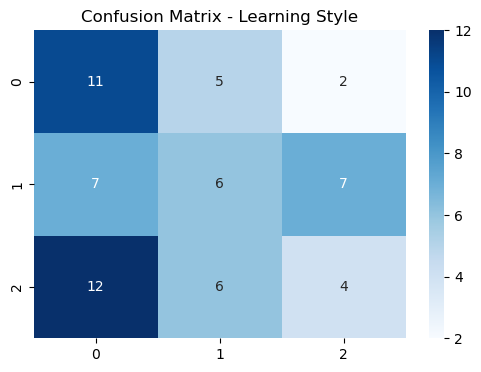

Naive Bayes (Stress Risk) Accuracy: 0.7
              precision    recall  f1-score   support

        High       0.64      0.70      0.67        10
         Low       0.88      0.62      0.73        24
      Medium       0.62      0.77      0.69        26

    accuracy                           0.70        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.73      0.70      0.70        60



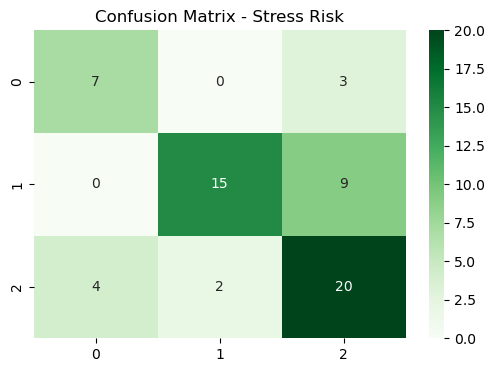

Decision Tree (Performance Improvement) Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        16
         Low       1.00      1.00      1.00        33
      Medium       1.00      1.00      1.00        11

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



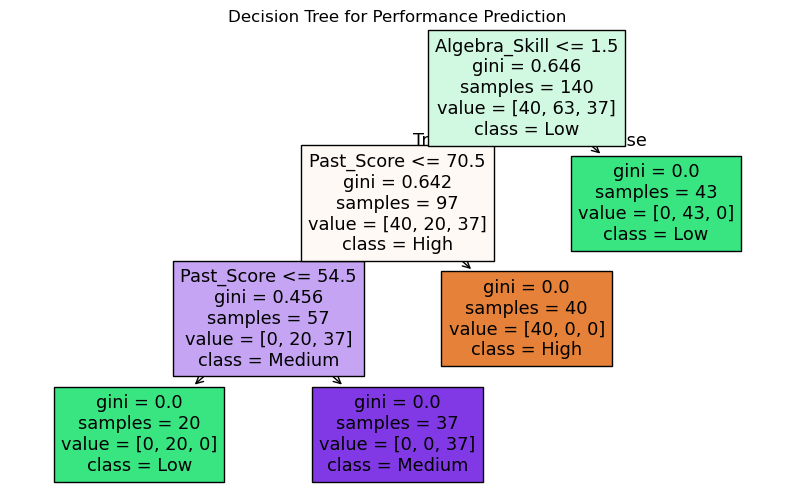


Sample Recommendations:
     Student_ID  Preferred_Style  Algebra_Skill  Stress_Level  \
95           96                1              1             1   
15           16                2              1             2   
30           31                0              1             1   
158         159                1              2             2   
128         129                2              2             1   
115         116                0              2             2   
69           70                2              2             1   
170         171                0              1             2   
174         175                1              0             2   
45           46                1              0             2   

                                   Rule_Based_Rec  
95         Reading material and group discussions  
15        Balanced study plan with practice tests  
30        Balanced study plan with practice tests  
158        Reading material and group discussions  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\proj4\student_learning_dataset.csv")

cat_cols = ["Algebra_Skill", "Preferred_Style", "Stress_Level", "Performance_Improvement"]
le = {}
for col in cat_cols:
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])

X = df[["Hours_Study", "Sleep_Hours", "Past_Score", "Algebra_Skill"]]
y_style = df["Preferred_Style"]
y_stress = df["Stress_Level"]
y_perf = df["Performance_Improvement"]

X_train, X_test, y_style_train, y_style_test = train_test_split(X, y_style, test_size=0.3, random_state=42)
_, _, y_stress_train, y_stress_test = train_test_split(X, y_stress, test_size=0.3, random_state=42)
_, _, y_perf_train, y_perf_test = train_test_split(X, y_perf, test_size=0.3, random_state=42)

nb_style = GaussianNB().fit(X_train, y_style_train)
pred_style = nb_style.predict(X_test)
print("Naive Bayes (Learning Style) Accuracy:", accuracy_score(y_style_test, pred_style))
print(classification_report(y_style_test, pred_style, target_names=le["Preferred_Style"].classes_))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_style_test, pred_style), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Learning Style")
plt.show()

nb_stress = GaussianNB().fit(X_train, y_stress_train)
pred_stress = nb_stress.predict(X_test)
print("Naive Bayes (Stress Risk) Accuracy:", accuracy_score(y_stress_test, pred_stress))
print(classification_report(y_stress_test, pred_stress, target_names=le["Stress_Level"].classes_))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_stress_test, pred_stress), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Stress Risk")
plt.show()

dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_perf_train)
pred_perf = dt.predict(X_test)
print("Decision Tree (Performance Improvement) Accuracy:", accuracy_score(y_perf_test, pred_perf))
print(classification_report(y_perf_test, pred_perf, target_names=le["Performance_Improvement"].classes_))
plt.figure(figsize=(10,6))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=le["Performance_Improvement"].inverse_transform(dt.classes_),
    filled=True
)
plt.title("Decision Tree for Performance Prediction")
plt.show()

def rule_based_recommendation(row):
    if row["Algebra_Skill"] == le["Algebra_Skill"].transform(["Weak"])[0] and row["Preferred_Style"] == le["Preferred_Style"].transform(["Visual"])[0]:
        return "Video-based algebra lessons + daily practice"
    elif row["Algebra_Skill"] == le["Algebra_Skill"].transform(["Weak"])[0] and row["Preferred_Style"] == le["Preferred_Style"].transform(["Kinesthetic"])[0]:
        return "Hands-on projects and practical exercises"
    elif row["Stress_Level"] == le["Stress_Level"].transform(["High"])[0] and row["Sleep_Hours"] < 6:
        return "Improve sleep routine and stress management"
    elif row["Preferred_Style"] == le["Preferred_Style"].transform(["Verbal"])[0]:
        return "Reading material and group discussions"
    elif row["Past_Score"] < 60:
        return "Balanced study plan with practice tests"
    else:
        return "Personalized coaching and mock tests"

sample_df = df.sample(10, random_state=42).copy()
sample_df["Rule_Based_Rec"] = sample_df.apply(rule_based_recommendation, axis=1)
print("\nSample Recommendations:")
print(sample_df[["Student_ID", "Preferred_Style", "Algebra_Skill", "Stress_Level", "Rule_Based_Rec"]])
